<a href="https://colab.research.google.com/github/SCS-Technology-and-Innovation/DACS/blob/main/DTDA/sync.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
count = 30
period = 7

from random import random, randint

# coordinates of the fireflies
x = [ random() for fly in range(count) ]
y = [ random() for fly in range(count) ]

# how long until each blinks for the first time
timer = [ randint(0, period) for fly in range(count) ]
' '.join([ str(t) for t in timer]) # let's see them

'4 4 1 5 4 2 2 1 4 3 7 4 1 6 7 2 6 4 2 6 3 4 6 4 0 1 4 2 7 1'

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'black'

base = 'green'
flash = 'yellow'

def step(notNeeded): # this needs to accept a parameter to match a library we will use, but we do not need it ourselves
    global timer
    colors = [ flash if t == 0 else base for t in timer ]
    plt.scatter(x, y, c = colors, marker = '*', s = 200) # draw each firefly
    for fly in range(count): # update each fly
      current = timer[fly] 
      timer[fly] = period if current == 0 else current - 1 # tick down

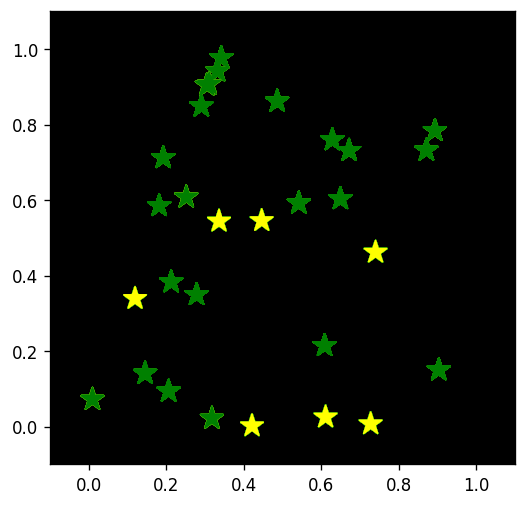

In [21]:
from matplotlib import rc
rc('animation', html='jshtml')

duration = 30 # how many steps to simulate
fig = plt.figure(figsize = (5, 5), dpi = 120)
span = [ -0.1, 1.1 ]
plt.xlim(span)
plt.ylim(span)

import matplotlib.animation as animation
animation.FuncAnimation(fig, step, frames = duration, repeat = False)

Now, let's allow each fly to see any neighboring fly within a specified, circular range of vision.

In [22]:
visual = 0.3 

from math import sqrt

def dist(p1, p2):
  return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

from collections import defaultdict 

neighbors = defaultdict(set)
pos = [ p for p in zip(x, y) ]
for f1 in range(count):
  p1 = pos[f1]
  for f2 in range(f1 + 1, count):
    p2 = pos[f2]
    if dist(p1, p2) < visual:
      neighbors[f1].add(f2)
      neighbors[f2].add(f1)
neighbors

defaultdict(set,
            {0: {1, 12, 23},
             1: {0, 2, 9, 12, 14, 15, 23},
             12: {0, 1, 15, 23},
             23: {0, 1, 2, 9, 11, 12, 14, 15},
             2: {1, 4, 14, 15, 17, 18, 23, 27, 29},
             9: {1, 7, 10, 13, 14, 16, 19, 23},
             14: {1, 2, 9, 11, 15, 23, 27, 29},
             15: {1, 2, 11, 12, 14, 23},
             4: {2, 3, 5, 17, 18, 27, 28, 29},
             17: {2, 3, 4, 5, 18, 27, 28, 29},
             18: {2, 4, 5, 13, 17, 24, 27, 29},
             27: {2, 4, 5, 13, 14, 17, 18, 24, 29},
             29: {2, 4, 5, 14, 17, 18, 24, 27},
             3: {4, 5, 17, 20, 22, 25, 28},
             5: {3, 4, 17, 18, 25, 27, 28, 29},
             20: {3, 21, 22, 28},
             22: {3, 6, 20, 21},
             25: {3, 5, 28},
             28: {3, 4, 5, 17, 20, 25},
             6: {11, 21, 22, 26},
             11: {6, 14, 15, 23},
             21: {6, 20, 22, 26},
             26: {6, 8, 21},
             7: {9, 10, 13, 16, 19, 24},


Let's count how many buddies everyone has.

In [41]:
buddies = { fly : len(neighbors[fly]) for fly in neighbors }
majority = { fly : buddies[fly] / 2 for fly in neighbors}
buddies

{0: 3,
 1: 7,
 12: 4,
 23: 8,
 2: 9,
 9: 8,
 14: 8,
 15: 6,
 4: 8,
 17: 8,
 18: 8,
 27: 9,
 29: 8,
 3: 7,
 5: 8,
 20: 4,
 22: 4,
 25: 3,
 28: 6,
 6: 4,
 11: 4,
 21: 4,
 26: 3,
 7: 6,
 10: 5,
 13: 8,
 16: 6,
 19: 6,
 24: 7,
 8: 1}

Whenever a fly sees a lot of flashes but still has a long way to go before it was going to flash itself, we can make the fly hurry up a bit.

In [42]:
half = period // 2

def sync(z):  
    global timer
    colors = [ flash if t == 0 else base for t in timer ]
    plt.scatter(x, y, c = colors, marker = '*', s = 200) # draw each firefly
    for fly in range(count): # fly behavior will be more complex now
      current = timer[fly]
      seen = sum( [ timer[f] == 0 for f in neighbors[fly] ] ) # how many neighbors just flashed
      most = (seen >= majority[fly]) # was it most of them
      if current == 0: # if this fly just flashed
        timer[fly] = period # restart the countdown if just flashed 
        if not most: # most of the neighbors did NOT flash 
          timer[fly] += 1 # slow down one tick
      else: # this fly did NOT flash just now
        timer[fly] = current - 1 # tick down normally
        if timer[fly] > 0 and most: # most of the neighbors did flash and this one is still not ready
          timer[fly] -= 1 # hurry up 

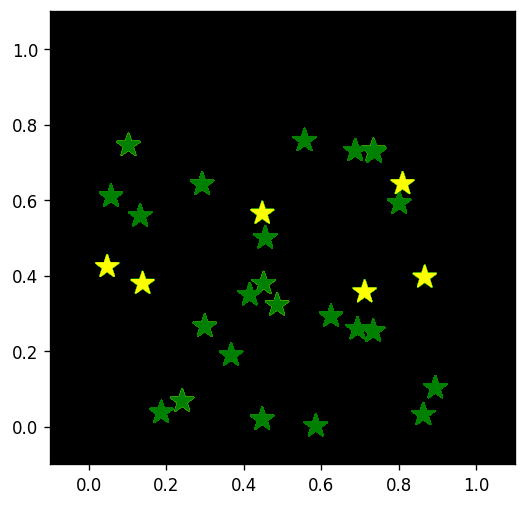

In [44]:
timer = [ randint(0, period) for fly in range(count) ] # reset the timers 
duration = 100
fig = plt.figure(figsize = (5, 5), dpi = 120)
plt.xlim(span)
plt.ylim(span)

animation.FuncAnimation(fig, sync, frames = duration, repeat = False)